# ML II : Linear models


L'objectif de ce notebook est de vous familiariser avec l'approche machine learning.

Les données sont issues de Kaggle, disponibles sur [ce lien](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

*01/12/26*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Lecture et mise en forme des données

In [3]:
df = pd.read_csv("train.csv")

# on ne garde que les colonnes numériques
numerical_df = (
    df.select_dtypes(include="number")
    .drop(columns=["Id"])
    .dropna(axis="rows", how="any")
)  # on enlève les lignes avec des NaN


numerical_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [32]:
X, y = numerical_df.drop(columns=["SalePrice"]), numerical_df["SalePrice"]

## Train test split pour évaluer la performance du modèle

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
len(X_train), len(X_test)

(896, 225)

In [35]:
len(X)

1121

## Compare validation RMSE by predicting the log of the target for MLR (Multiple linear regression)

La distribution de la target est très asymétrique, on va donc prédire le log de la target (plus proche d'une gaussienne) pour améliorer la performance du modèle.

### Effet du log

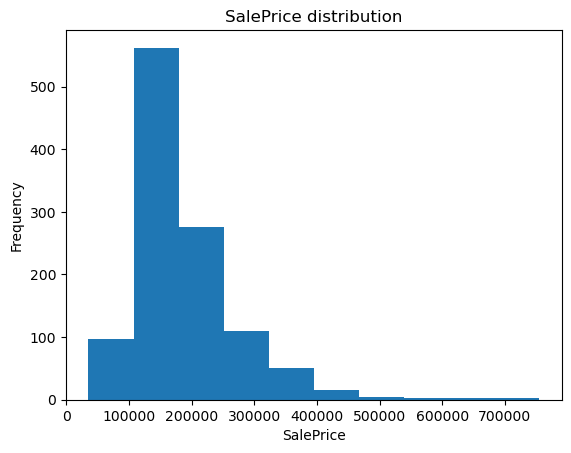

In [36]:
y.plot(kind="hist")
plt.title("SalePrice distribution")
plt.xlabel("SalePrice");

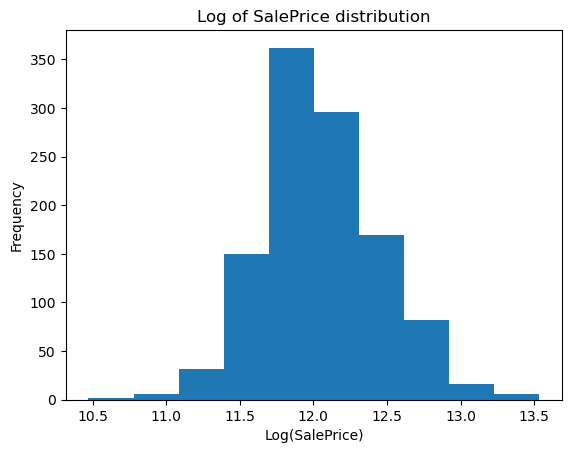

In [37]:
import numpy as np

np.log(y).plot(kind="hist")
plt.title("Log of SalePrice distribution")
plt.xlabel("Log(SalePrice)");

## Evaluation de la prédiction de SalePrice

In [38]:
model = LinearRegression()
model

LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# as permet d'aliaser des fonctions ou des modules comme en SQL
from sklearn.metrics import root_mean_squared_error as rmse

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = rmse(y_train, y_train_pred)
mse_test = rmse(y_test, y_test_pred)

print(f"Train RMSE y: {mse_train:.2f}")
print(f"Test RMSE y: {mse_test:.2f}")

Train RMSE y: 35608.43
Test RMSE y: 39852.60


Question de Michel sur comment prédire un nouveau point de données.

In [41]:
test_michel = X_test.sample(1, random_state=2)

pred_michel = model.predict(test_michel)

print(f"Prediction for Michel's house: {pred_michel[0]:.2f} $")

Prediction for Michel's house: 186029.48 $


### Effet du log

In [44]:
log_y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, log_y, test_size=0.2, random_state=44
)

model_log = LinearRegression()
model_log.fit(X_train, y_train)

y_train_pred = model_log.predict(X_train)
y_test_pred = model_log.predict(X_test)

# ici on exponentie les prédictions pour revenir à l'échelle originale
y_train_pred_exp = np.exp(y_train_pred)
y_test_pred_exp = np.exp(y_test_pred)

mse_train = rmse(np.exp(y_train), y_train_pred_exp)
mse_test = rmse(np.exp(y_test), y_test_pred_exp)

print(f"Train RMSE log(y): {mse_train:.2f}")
print(f"Test RMSE log(y): {mse_test:.2f}")



Train RMSE log(y): 36864.32
Test RMSE log(y): 35050.48


On est meilleurs sur le test ! En revanche on observe un comportement étrange où la rmse de train est plus élevée que celle de test. Cela peut arriver lorsque le jeu de données est petit et que la répartition des points n'est pas homogène entre train et test. Ici, on a de la chance d'avoir un jeu de test plus "facile" que le jeu de train. On peut investiguer en cross validant le modèle pour voir si la performance est stable entre les folds.

## Effet de la standardisation des features

compare validation RMSE by standardizing input feature in MLR
is there an effect on the score ? why ? 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X, y = numerical_df.drop(columns=["SalePrice"]), numerical_df["SalePrice"]

pipe = make_pipeline(StandardScaler(), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(
    X, np.log(y), test_size=0.2, random_state=42)

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print(f"Train RMSE log(y) avec scaling: {np.exp(rmse(y_train, y_train_pred)):.2f}")
print(f"Test RMSE log(y) avec scaling: {np.exp(rmse(y_test, y_test_pred)):.2f}")

Train RMSE log(y) avec scaling: 1.16
Test RMSE log(y) sans scaling: 1.14


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X, y = numerical_df.drop(columns=["SalePrice"]), numerical_df["SalePrice"]

pipe = make_pipeline(LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(
    X, np.log(y), test_size=0.2, random_state=42)

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print(f"Train RMSE log(y) sans scaling: {np.exp(rmse(y_train, y_train_pred)):.2f}")
print(f"Test RMSE log(y) sans scaling: {np.exp(rmse(y_test, y_test_pred)):.2f}")

Train RMSE log(y) sans scaling: 1.16
Test RMSE log(y) sans scaling: 1.14


Ca ne change rien car les coefficients de la regression lineaire s'adaptent en fonction de l'echelle des features. En revanche la standardisation est importante pour comparer les coefficients entre eux (importance relative des features) et pour les modèles régularisés (Ridge, Lasso) car la pénalisation dépend de l'amplitude des coefficients.